#Importando as bibliotecas 


In [ ]:
!pip install lightkurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 95.2 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=a4310d3934d1de35c56999aa67cd0635fd9cf240ac432b1079ac7e5

In [ ]:
import lightkurve as lk
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Baixando os dados da curva de luz

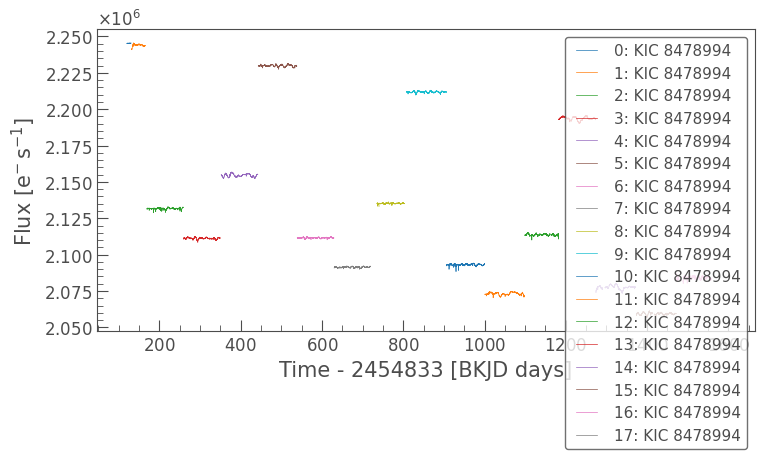

In [ ]:
# Search for Kepler observations of Kepler-37
search_result = lk.search_lightcurve('Kepler-37', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();

In [ ]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr008478994,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr008478994,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr008478994,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr008478994,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr008478994,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr008478994,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr008478994,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr008478994,0.0
8,Kepler Quarter 08,2011,Kepler,1800,kplr008478994,0.0


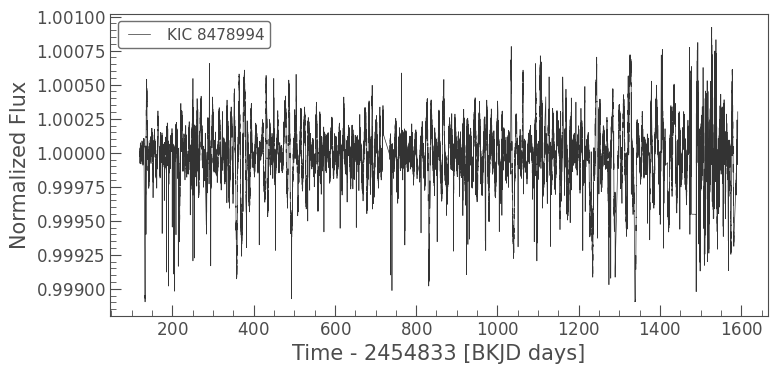

In [ ]:
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

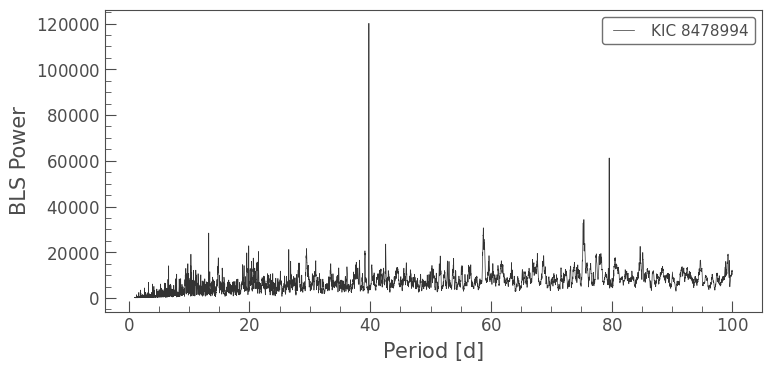

In [ ]:
period = np.linspace(1, 100, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

##Importando as bases de dados

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df100  = pd.read_csv('/content/gdrive/MyDrive/logArthur/data100.csv')
df250  = pd.read_csv('/content/gdrive/MyDrive/logArthur/data250.csv')
df500  = pd.read_csv('/content/gdrive/MyDrive/logArthur/data500.csv')
df750  = pd.read_csv('/content/gdrive/MyDrive/logArthur/data750.csv')
df1000 = pd.read_csv('/content/gdrive/MyDrive/logArthur/data1000.csv')
df2000 = pd.read_csv('/content/gdrive/MyDrive/logArthur/data2000.csv')

##Visualizando o formato do dataFrame

In [ ]:
df100.tail()

,i1,i2,d
4945,96,98,0.979946
4946,96,99,0.969540
4947,97,98,0.990074
4948,97,99,0.979875
4949,98,99,0.989976


In [ ]:
df250.tail()

,i1,i2,d
31120,246,248,0.992013
31121,246,249,0.987977
31122,247,248,0.996024
31123,247,249,0.992021
31124,248,249,0.996020


In [ ]:
df500.tail()

,i1,i2,d
124745,496,498,0.996008
124746,496,499,0.994010
124747,497,498,0.997991
124748,497,499,0.996001
124749,498,499,0.997990


In [ ]:
df750.tail()

,i1,i2,d
280870,746,748,0.997367
280871,746,749,0.996041
280872,747,748,0.998691
280873,747,749,0.997368
280874,748,749,0.998692


In [ ]:
df1000.tail()

,i1,i2,d
499495,996,998,0.998003
499496,996,999,0.997007
499497,997,998,0.998996
499498,997,999,0.998002
499499,998,999,0.998995


In [ ]:
df2000.tail()

,i1,i2,d
1998995,1996,1998,0.998986
1998996,1996,1999,0.998489
1998997,1997,1998,0.999483
1998998,1997,1999,0.998987
1998999,1998,1999,0.999484


##Ajuste no DataFrame

In [ ]:
df100['dif'] = df100['i2'] - df100['i1']
df100.head()

,i1,i2,d,dif
0,0,1,0.989665,1
1,0,2,0.979156,2
2,0,3,0.968427,3
3,0,4,0.957589,4
4,0,5,0.946524,5


In [ ]:
df250['dif'] = df250['i2'] - df250['i1']
df250.head()

,i1,i2,d,dif
0,0,1,0.995910,1
1,0,2,0.991792,2
2,0,3,0.987643,3
3,0,4,0.983455,4
4,0,5,0.979234,5


In [ ]:
df500['dif'] = df500['i2'] - df500['i1']
df500.head()

,i1,i2,d,dif
0,0,1,0.997907,1
1,0,2,0.995834,2
2,0,3,0.993779,3
3,0,4,0.991714,4
4,0,5,0.989642,5


In [ ]:
df750['dif'] = df750['i2'] - df750['i1']
df750.head()

,i1,i2,d,dif
0,0,1,0.998640,1
1,0,2,0.997262,2
2,0,3,0.995887,3
3,0,4,0.994504,4
4,0,5,0.993121,5


In [ ]:
df1000['dif'] = df1000['i2'] - df1000['i1']
df1000.head()

,i1,i2,d,dif
0,0,1,0.998957,1
1,0,2,0.997930,2
2,0,3,0.996897,3
3,0,4,0.995858,4
4,0,5,0.994789,5


In [ ]:
df2000['dif'] = df2000['i2'] - df2000['i1']
df2000.head()

,i1,i2,d,dif
0,0,1,0.999463,1
1,0,2,0.998949,2
2,0,3,0.998434,3
3,0,4,0.997919,4
4,0,5,0.997401,5


##Contruindo o dicionário de dados

In [ ]:
dataDic100 = {}

with open('/content/gdrive/MyDrive/logArthur/data100.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic100:
            dataDic100[dif] = [d]
        else:
            dataDic100[dif].append(d)

In [ ]:
dataDic250 = {}

with open('/content/gdrive/MyDrive/logArthur/data250.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic250:
            dataDic250[dif] = [d]
        else:
            dataDic250[dif].append(d)

In [ ]:
dataDic500 = {}

with open('/content/gdrive/MyDrive/logArthur/data500.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic500:
            dataDic500[dif] = [d]
        else:
            dataDic500[dif].append(d)

In [ ]:
dataDic750 = {}

with open('/content/gdrive/MyDrive/logArthur/data750.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic750:
            dataDic750[dif] = [d]
        else:
            dataDic750[dif].append(d)

In [ ]:
dataDic1000 = {}

with open('/content/gdrive/MyDrive/logArthur/data1000.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic1000:
            dataDic1000[dif] = [d]
        else:
            dataDic1000[dif].append(d)

In [ ]:
dataDic2000 = {}

with open('/content/gdrive/MyDrive/logArthur/data2000.csv', 'r') as f:
    lines = f.readlines()
    for i in range(1,len(lines)):
        line = lines[i]
        i1,i2,d = line.split(',')
        i1 = int(i1)
        i2 = int(i2)
        d = float(d.split()[0])
        dif = i2 - i1
        if dif not in dataDic2000:
            dataDic2000[dif] = [d]
        else:
            dataDic2000[dif].append(d)

#Plot dos Resultados

###100 pontos

In [ ]:
eixoX100 = []
eixoY100 = []
for key in dataDic100:
    lisD = dataDic100[key]
    eixoX100.append(key)
    eixoY100.append(np.max(lisD))

#### Bls

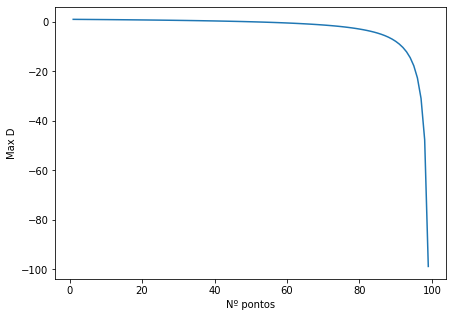

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(eixoX100,eixoY100)
plt.xlabel("Nº pontos")
plt.ylabel("Max D")
plt.savefig("/content/gdrive/MyDrive/Imagens/bls_100.png",dpi=1200)
plt.show()

#### Delta

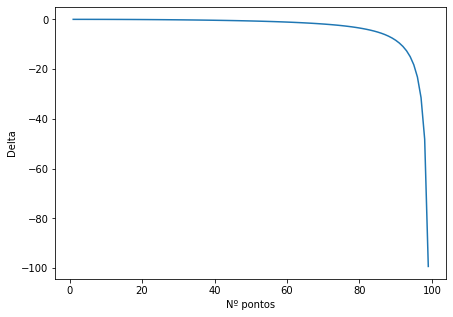

delta100 = -0.64144003087813


In [ ]:
delta100 = [eixoY100[i] - np.array(bls.frequency[i]) for i in range(len(eixoY100))]

plt.figure(figsize=(7,5))
plt.plot(eixoX100,delta100)
plt.xlabel("Nº pontos")
plt.ylabel("Delta")
plt.savefig("/content/gdrive/MyDrive/Imagens/diff_100.png",dpi=1200)
plt.show()

delta100 = np.divide(np.sum(delta100[:79]),89)
print(f'delta100 = {delta100}')

#### Const

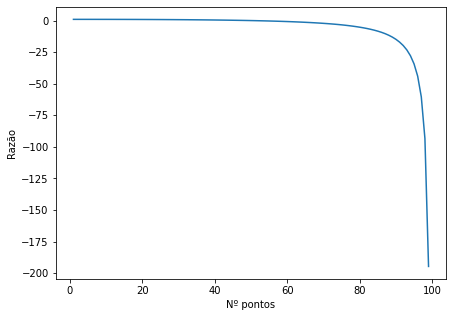

razao100 = -0.14909166672913007


In [ ]:
razao100 = [eixoY100[i] / np.array(bls.frequency[i]) for i in range(len(eixoY100))]

plt.figure(figsize=(7,5))
plt.plot(eixoX100,razao100)
plt.xlabel("Nº pontos")
plt.ylabel("Razão")
plt.savefig("/content/gdrive/MyDrive/Imagens/const_100.png",dpi=1200)
plt.show()

razao100 = np.divide(np.sum(razao100[:79]),89)
print(f'razao100 = {razao100}')

##250 pontos

In [ ]:
eixoX250 = []
eixoY250 = []
for key in dataDic250:
    lisD = dataDic250[key]
    eixoX250.append(key)
    eixoY250.append(np.max(lisD))

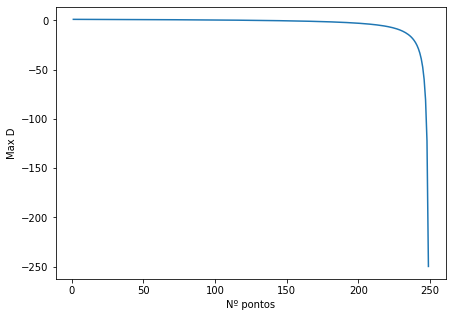

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(eixoX250,eixoY250)
plt.xlabel("Nº pontos")
plt.ylabel("Max D")
plt.savefig("/content/gdrive/MyDrive/Imagens/bls_250.png",dpi=1200)
plt.show()

#### Delta

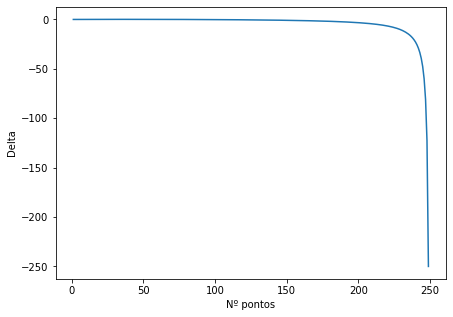

delta250 = -0.5404980159175231


In [ ]:
delta250 = [eixoY250[i] - np.array(bls.frequency[i]) for i in range(len(eixoY250))]

plt.figure(figsize=(7,5))
plt.plot(eixoX250,delta250)
plt.xlabel("Nº pontos")
plt.ylabel("Delta")
plt.savefig("/content/gdrive/MyDrive/Imagens/diff_250.png",dpi=1200)
plt.show()

delta250 = np.divide(np.sum(delta250[:199]),200)
print(f'delta250 = {delta250}')

#### Razão

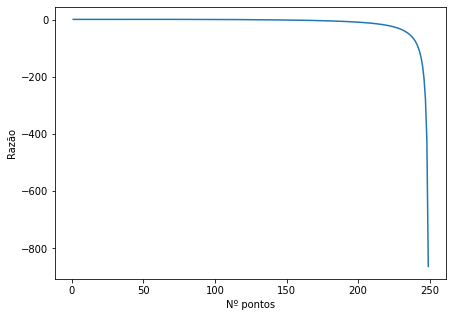

razao250 = -0.472169641169655


In [ ]:
razao250 = [eixoY250[i] / np.array(bls.frequency[i]) for i in range(len(eixoY250))]

plt.figure(figsize=(7,5))
plt.plot(eixoX250,razao250)
plt.xlabel("Nº pontos")
plt.ylabel("Razão")
plt.savefig("/content/gdrive/MyDrive/Imagens/const_250.png",dpi=1200)
plt.show()

razao250 = np.divide(np.sum(razao250[:199]),200)
print(f'razao250 = {razao250}')

##500 pontos

In [ ]:
eixoX500 = []
eixoY500 = []
for key in dataDic500:
    lisD = dataDic500[key]
    eixoX500.append(key)
    eixoY500.append(np.max(lisD))

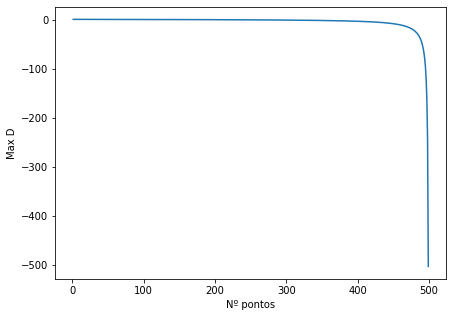

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(eixoX500,eixoY500)
plt.xlabel("Nº pontos")
plt.ylabel("Max D")
plt.savefig("/content/gdrive/MyDrive/Imagens/bls_500.png",dpi=1200)
plt.show()

#### Delta

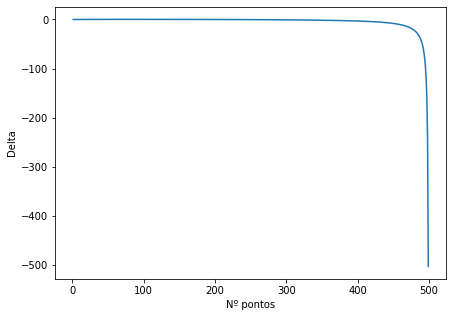

delta500 = -0.39714910902167133


In [ ]:
delta500 = [eixoY500[i] - np.array(bls.frequency[i]) for i in range(len(eixoY500))]

plt.figure(figsize=(7,5))
plt.plot(eixoX500,delta500)
plt.xlabel("Nº pontos")
plt.ylabel("Delta")
plt.savefig("/content/gdrive/MyDrive/Imagens/diff_500.png",dpi=1200)
plt.show()

delta500 = np.divide(np.sum(delta500[:399]),400)
print(f'delta500 = {delta500}')

#### Const

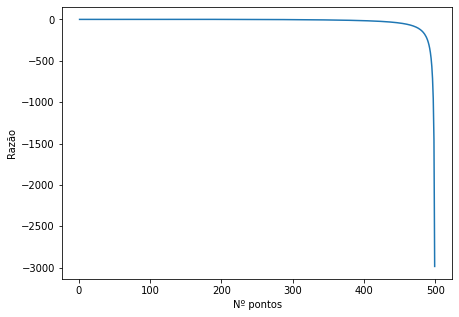

razao500 = -0.9755006715544141


In [ ]:
razao500 = [eixoY500[i] / np.array(bls.frequency[i]) for i in range(len(eixoY500))]

plt.figure(figsize=(7,5))
plt.plot(eixoX500,razao500)
plt.xlabel("Nº pontos")
plt.ylabel("Razão")
plt.savefig("/content/gdrive/MyDrive/Imagens/const_500.png",dpi=1200)
plt.show()

razao500 = np.divide(np.sum(razao500[:399]),400)
print(f'razao500 = {razao500}')

##750 pontos

In [ ]:
eixoX750 = []
eixoY750 = []
for key in dataDic750:
    lisD = dataDic750[key]
    eixoX750.append(key)
    eixoY750.append(np.max(lisD))

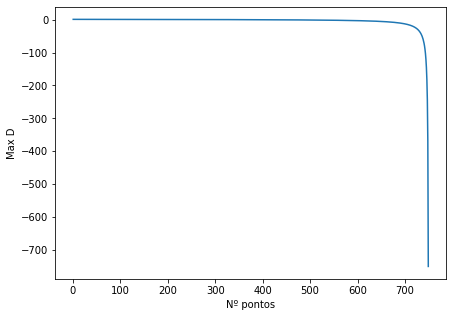

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(eixoX750,eixoY750)
plt.xlabel("Nº pontos")
plt.ylabel("Max D")
plt.savefig("/content/gdrive/MyDrive/Imagens/bls_750.png",dpi=1200)
plt.show()

#### Delta

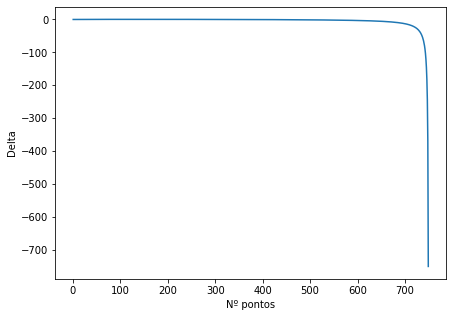

delta750 = -0.3198670062047795


In [ ]:
delta750 = [eixoY750[i] - np.array(bls.frequency[i]) for i in range(len(eixoY750))]

plt.figure(figsize=(7,5))
plt.plot(eixoX750,delta750)
plt.xlabel("Nº pontos")
plt.ylabel("Delta")
plt.savefig("/content/gdrive/MyDrive/Imagens/diff_750.png",dpi=1200)
plt.show()

delta750 = np.divide(np.sum(delta750[:599]),600)
print(f'delta750 = {delta750}')

#### Razão

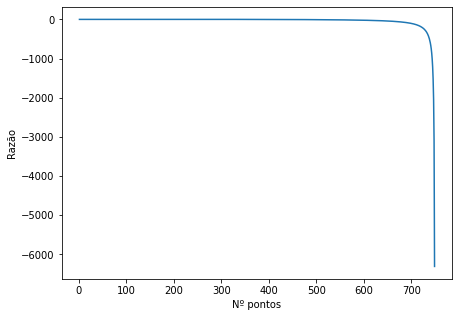

razao750 = -1.476087989005555


In [ ]:
razao750 = [eixoY750[i] / np.array(bls.frequency[i]) for i in range(len(eixoY750))]

plt.figure(figsize=(7,5))
plt.plot(eixoX750,razao750)
plt.xlabel("Nº pontos")
plt.ylabel("Razão")
plt.savefig("/content/gdrive/MyDrive/Imagens/const_750.png",dpi=1200)
plt.show()

razao750 = np.divide(np.sum(razao750[:599]),600)
print(f'razao750 = {razao750}')

##1000 pontos

In [ ]:
eixoX1000 = []
eixoY1000 = []
for key in dataDic1000:
    lisD = dataDic1000[key]
    eixoX1000.append(key)
    eixoY1000.append(np.max(lisD))

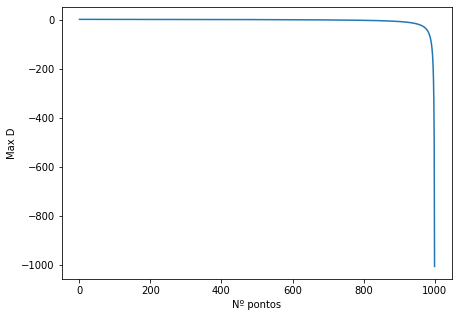

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(eixoX1000,eixoY1000)
plt.xlabel("Nº pontos")
plt.ylabel("Max D")
plt.savefig("/content/gdrive/MyDrive/Imagens/bls_1000.png",dpi=1200)
plt.show()

#### Delta

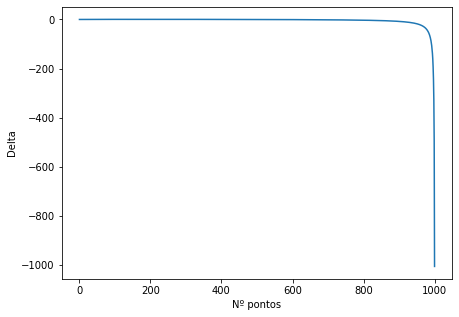

delta1000 = -0.2691889716553322


In [ ]:
delta1000 = [eixoY1000[i] - np.array(bls.frequency[i]) for i in range(len(eixoY1000))]

plt.figure(figsize=(7,5))
plt.plot(eixoX1000,delta1000)
plt.xlabel("Nº pontos")
plt.ylabel("Delta")
plt.savefig("/content/gdrive/MyDrive/Imagens/diff_1000.png",dpi=1200)
plt.show()

delta1000 = np.divide(np.sum(delta1000[:799]),800)
print(f'delta1000 = {delta1000}')

#### Razão

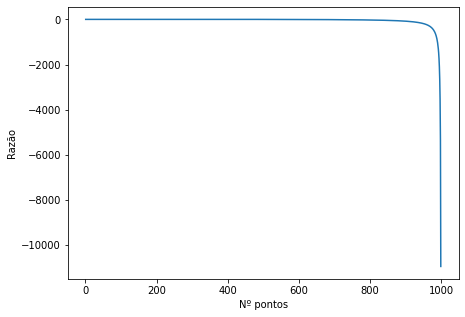

razao1000 = -1.9666543632163473


In [ ]:
razao1000 = [eixoY1000[i] / np.array(bls.frequency[i]) for i in range(len(eixoY1000))]

plt.figure(figsize=(7,5))
plt.plot(eixoX1000,razao1000)
plt.xlabel("Nº pontos")
plt.ylabel("Razão")
plt.savefig("/content/gdrive/MyDrive/Imagens/const_1000.png",dpi=1200)
plt.show()

razao1000 = np.divide(np.sum(razao1000[:799]),800)
print(f'razao1000 = {razao1000}')

##Para 2000 pontos

In [ ]:
eixoX2000 = []
eixoY2000 = []
for key in dataDic2000:
    lisD = dataDic2000[key]
    eixoX2000.append(key)
    eixoY2000.append(np.max(lisD))

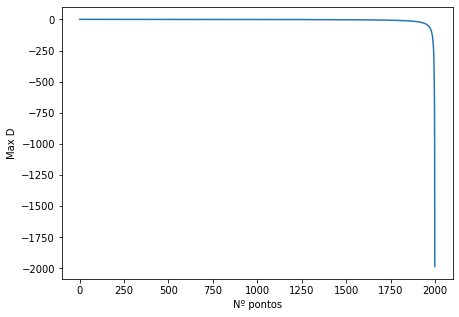

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(eixoX2000,eixoY2000)
plt.xlabel("Nº pontos")
plt.ylabel("Max D")
plt.savefig("/content/gdrive/MyDrive/Imagens/bls_2000.png",dpi=1200)
plt.show()

#### Delta

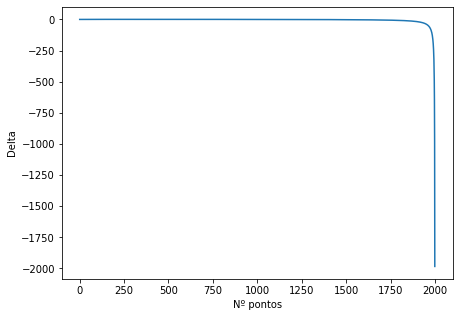

delta2000 = -0.17174426847393603


In [ ]:
delta2000 = [eixoY2000[i] - np.array(bls.frequency[i]) for i in range(len(eixoY2000))]

plt.figure(figsize=(7,5))
plt.plot(eixoX2000,delta2000)
plt.xlabel("Nº pontos")
plt.ylabel("Delta")
plt.savefig("/content/gdrive/MyDrive/Imagens/diff_2000.png",dpi=1200)
plt.show()

delta2000 = np.divide(np.sum(delta2000[:1599]),1600)
print(f'delta2000 = {delta2000}')

#### Razão

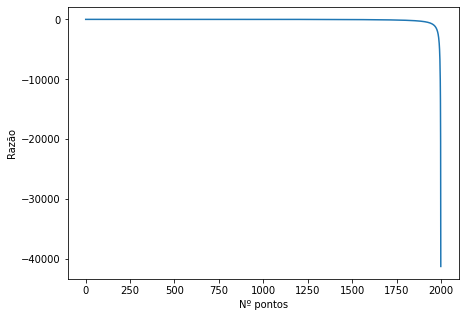

razao2000 = -3.9570113691243294


In [ ]:
razao2000 = [eixoY2000[i] / np.array(bls.frequency[i]) for i in range(len(eixoY2000))]

plt.figure(figsize=(7,5))
plt.plot(eixoX2000,razao2000)
plt.xlabel("Nº pontos")
plt.ylabel("Razão")
plt.savefig("/content/gdrive/MyDrive/Imagens/const_2000.png",dpi=1200)
plt.show()

razao2000 = np.divide(np.sum(razao2000[:1599]),1600)
print(f'razao2000 = {razao2000}')

##Plot das constantes

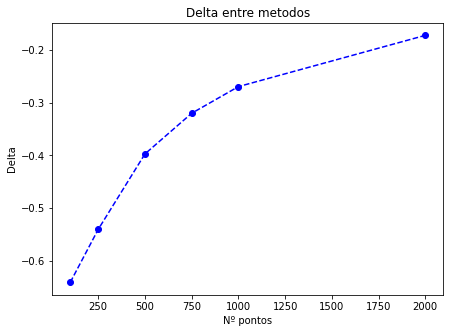

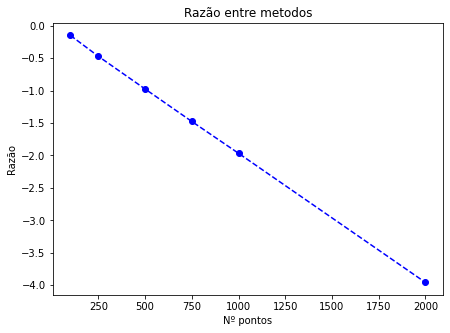

In [ ]:
lisDelta = [delta100,delta250,delta500,delta750,delta1000,delta2000]
lisRazao = [razao100,razao250,razao500,razao750,razao1000,razao2000]
eixoX = [100,250,500,750,1000,2000]

plt.figure(figsize=(7,5))
plt.plot(eixoX,lisDelta,'b--o')
plt.title("Delta entre metodos")
plt.xlabel("Nº pontos")
plt.ylabel("Delta")
plt.savefig("/content/gdrive/MyDrive/Imagens/deltaConclusao.png",dpi=1200)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(eixoX,lisRazao,'b--o')
plt.title("Razão entre metodos")
plt.xlabel("Nº pontos")
plt.ylabel("Razão")
plt.savefig("/content/gdrive/MyDrive/Imagens/razaoConclusao.png",dpi=1200)
plt.show()

In [ ]:
lisAux = [100,250,500,750,1000,2000] 

for i in range(len(lisDelta)):
    print(f'Para {lisAux[i]} pontos, delta = {lisDelta[i]}')
    print(f'Para {lisAux[i]} pontos, razao = {lisRazao[i]}')
    print("*"*60)

Para 100 pontos, delta = -0.64144003087813
Para 100 pontos, razao = -0.14909166672913007
************************************************************
Para 250 pontos, delta = -0.5404980159175231
Para 250 pontos, razao = -0.472169641169655
************************************************************
Para 500 pontos, delta = -0.39714910902167133
Para 500 pontos, razao = -0.9755006715544141
************************************************************
Para 750 pontos, delta = -0.3198670062047795
Para 750 pontos, razao = -1.476087989005555
************************************************************
Para 1000 pontos, delta = -0.2691889716553322
Para 1000 pontos, razao = -1.9666543632163473
************************************************************
Para 2000 pontos, delta = -0.17174426847393603
Para 2000 pontos, razao = -3.9570113691243294
************************************************************


# Regressão 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = [[100],[250],[500],[750],[1000],[2000]]
model = LinearRegression().fit(X, lisRazao)

In [ ]:
print(f'coeficiente = {model.coef_[0]}')
print(f'constante   = {model.intercept_}')

coeficiente = -0.001997646488487128
constante   = 0.03210969104022632


In [ ]:
def linearRegressionCoeficient(dataX,dataY):
    mediaX = np.mean(dataX)
    mediaY = np.mean(dataY)
    SSxx = np.sum(np.fromiter(((mediaX-x)**2 for x in  dataX),dtype=float))
    SSxy = np.sum(np.fromiter(((mediaX-x)*(mediaY-y) for x,y in zip(dataX,dataY)),dtype=float))
    return SSxy/SSxx

In [ ]:
# for i in range(len(lisRazao)-1):
#     deltaY = lisRazao[i+1]-lisRazao[i]
#     deltaX = eixoX[i+1]-eixoX[i]
#     print(f'delta = {deltaY/deltaX}')

for i in range(len(lisRazao)-1):
    deltaY = lisRazao[i+1]-lisRazao[i]
    print(f'{lisRazao[i+1]} - {lisRazao[i]} = {deltaY}')

-0.472169641169655 - -0.14909166672913007 = -0.3230779744405249
-0.9755006715544141 - -0.472169641169655 = -0.5033310303847591
-1.476087989005555 - -0.9755006715544141 = -0.5005873174511408
-1.9666543632163473 - -1.476087989005555 = -0.4905663742107924
-3.9570113691243294 - -1.9666543632163473 = -1.990357005907982
